## 1. Import all packages and the data

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))
import os
os.chdir("/Users")

In [2]:
#importing packages 
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
Crude_oil= pd.read_excel('/Users/ranjitarajeevashetty/Library/Mobile Documents/com~apple~CloudDocs/Interview/2019 full time/Fitbit/PET_PRI_SPT_S1_M.xls', sheet_name='Data 1',skiprows=2)
Crude_oil.head()

,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel)
0,1986-01-15,22.93,NaN
1,1986-02-15,15.46,NaN
2,1986-03-15,12.61,NaN
3,1986-04-15,12.84,NaN
4,1986-05-15,15.38,NaN


In [4]:
Con_Gasoline= pd.read_excel('/Users/ranjitarajeevashetty/Library/Mobile Documents/com~apple~CloudDocs/Interview/2019 full time/Fitbit/PET_PRI_SPT_S1_M.xls', sheet_name='Data 2',skiprows=2)

Con_Gasoline.head()

,Date,New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)
0,1986-06-15,0.420,0.409
1,1986-07-15,0.340,0.334
2,1986-08-15,0.426,0.416
3,1986-09-15,0.420,0.398
4,1986-10-15,0.410,0.400


In [5]:
Reg_Gasoline= pd.read_excel('/Users/ranjitarajeevashetty/Library/Mobile Documents/com~apple~CloudDocs/Interview/2019 full time/Fitbit/PET_PRI_SPT_S1_M.xls', sheet_name='Data 3',skiprows=2)
Reg_Gasoline.head()

,Date,Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)
0,2003-06-15,1.072
1,2003-07-15,0.965
2,2003-08-15,1.315
3,2003-09-15,0.949
4,2003-10-15,0.996


In [6]:
Heating_oil= pd.read_excel('/Users/ranjitarajeevashetty/Library/Mobile Documents/com~apple~CloudDocs/Interview/2019 full time/Fitbit/PET_PRI_SPT_S1_M.xls', sheet_name='Data 4',skiprows=2)
Reg_Gasoline.head()

,Date,Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)
0,2003-06-15,1.072
1,2003-07-15,0.965
2,2003-08-15,1.315
3,2003-09-15,0.949
4,2003-10-15,0.996


In [7]:
Diesel= pd.read_excel('/Users/ranjitarajeevashetty/Library/Mobile Documents/com~apple~CloudDocs/Interview/2019 full time/Fitbit/PET_PRI_SPT_S1_M.xls', sheet_name='Data 5',skiprows=2)
Diesel.head()

,Date,New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),"Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)"
0,1996-04-15,NaN,NaN,0.950
1,1996-05-15,NaN,NaN,0.870
2,1996-06-15,NaN,NaN,0.745
3,1996-07-15,NaN,NaN,0.692
4,1996-08-15,NaN,NaN,0.705


In [8]:
Kerosene= pd.read_excel('/Users/ranjitarajeevashetty/Library/Mobile Documents/com~apple~CloudDocs/Interview/2019 full time/Fitbit/PET_PRI_SPT_S1_M.xls', sheet_name='Data 6',skiprows=2)
Kerosene.head()

,Date,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)
0,1990-04-15,0.540
1,1990-05-15,0.515
2,1990-06-15,0.494
3,1990-07-15,0.535
4,1990-08-15,0.791


In [10]:
Propane= pd.read_excel('/Users/ranjitarajeevashetty/Library/Mobile Documents/com~apple~CloudDocs/Interview/2019 full time/Fitbit/PET_PRI_SPT_S1_M.xls', sheet_name='Data 7',skiprows=2)
Propane.head()

,Date,"Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)"
0,1992-06-15,0.344
1,1992-07-15,0.342
2,1992-08-15,0.354
3,1992-09-15,0.375
4,1992-10-15,0.354


# 2.Clean and integrate the data into one master data set

> Checking for all the date ranges in each data

In [12]:
Dataframes_list= [Crude_oil,Con_Gasoline,Reg_Gasoline, Heating_oil,Diesel,Kerosene,Propane]
Dataframes_name =['Crude_oil','Con_Gasoline','Reg_Gasoline', 'Heating_oil','Diesel','Kerosene','Propane'] 
for df, dfname in zip(Dataframes_list,Dataframes_name):
    print('{} ; rows and columns {}; min date {}, max date {}'.format(dfname,df.shape, df['Date'].min(), df['Date'].max()))


Crude_oil ; rows and columns (396, 3); min date 1986-01-15 00:00:00, max date 2018-12-15 00:00:00
Con_Gasoline ; rows and columns (391, 3); min date 1986-06-15 00:00:00, max date 2018-12-15 00:00:00
Reg_Gasoline ; rows and columns (187, 2); min date 2003-06-15 00:00:00, max date 2018-12-15 00:00:00
Heating_oil ; rows and columns (391, 2); min date 1986-06-15 00:00:00, max date 2018-12-15 00:00:00
Diesel ; rows and columns (273, 4); min date 1996-04-15 00:00:00, max date 2018-12-15 00:00:00
Kerosene ; rows and columns (345, 2); min date 1990-04-15 00:00:00, max date 2018-12-15 00:00:00
Propane ; rows and columns (319, 2); min date 1992-06-15 00:00:00, max date 2018-12-15 00:00:00


> Join all table into one master dataframe

In [13]:
Data_frames= [Crude_oil,Con_Gasoline,Reg_Gasoline, Heating_oil,Diesel,Kerosene,Propane]
DF = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],how='outer'), Data_frames)
DF.describe()

,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel),New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon),New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon),New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),"Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)",U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon),"Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)"
count,396.000000,380.000000,391.000000,391.000000,187.000000,391.000000,151.000000,151.000000,273.000000,345.000000,319.000000
mean,43.789672,45.965105,1.267138,1.238263,2.149909,1.276936,2.294808,2.247675,1.710769,1.395635,0.713147
std,29.495303,33.050289,0.830734,0.814214,0.631765,0.885866,0.673668,0.668203,0.884417,0.912340,0.379733
min,11.350000,9.820000,0.307000,0.294000,0.949000,0.304000,0.979000,0.958000,0.391000,0.304000,0.209000
25%,19.660000,18.665000,0.556500,0.548500,1.644000,0.539500,1.794500,1.764500,0.870000,0.564000,0.372000
50%,29.770000,30.045000,0.885000,0.862000,2.080000,0.835000,2.140000,2.108000,1.656000,1.082000,0.610000
75%,63.845000,67.530000,1.919500,1.872000,2.674000,1.869000,2.960000,2.915000,2.288000,2.052000,0.970000
max,133.880000,132.720000,3.292000,3.284000,3.694000,3.801000,3.887000,3.851000,3.894000,3.886000,1.862000


In [14]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 395
Data columns (total 12 columns):
Date                                                                                 396 non-null datetime64[ns]
Cushing, OK WTI Spot Price FOB (Dollars per Barrel)                                  396 non-null float64
Europe Brent Spot Price FOB (Dollars per Barrel)                                     380 non-null float64
New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)    391 non-null float64
U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)    391 non-null float64
Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)       187 non-null float64
New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)                391 non-null float64
New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)         151 non-null float64
U.S. Gulf Coast Ultra-Low Sulfur No 2 Di

> We can see that there are missing values in all the columns except the first 2 which have 397 records non null

In [15]:
DF.dropna()

,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel),New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon),New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon),New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),"Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)",U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon),"Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)"
245,2006-06-15,70.95,68.56,2.065,2.123,2.401,1.925,2.091,2.108,2.269,2.081,1.097
246,2006-07-15,74.41,73.67,2.237,2.270,2.488,1.935,2.217,2.231,2.209,2.154,1.165
247,2006-08-15,73.04,73.23,2.038,2.001,2.190,1.984,2.247,2.233,2.300,2.133,1.138
248,2006-09-15,63.80,61.96,1.583,1.560,1.782,1.699,1.810,1.789,1.984,1.810,1.012
249,2006-10-15,58.89,57.81,1.506,1.510,1.686,1.648,1.794,1.784,1.809,1.739,0.938
250,2006-11-15,59.08,58.76,1.588,1.563,1.797,1.648,1.811,1.797,1.890,1.733,0.954
251,2006-12-15,61.96,62.47,1.670,1.597,1.805,1.684,1.833,1.791,2.023,1.810,0.966
252,2007-01-15,54.51,53.68,1.432,1.410,1.682,1.528,1.630,1.639,1.834,1.654,0.893
253,2007-02-15,59.28,57.56,1.640,1.612,2.019,1.693,1.759,1.777,2.006,1.740,0.975
254,2007-03-15,60.44,62.05,1.938,1.850,2.373,1.742,1.891,1.970,2.038,1.846,1.037


> Calculated the difference between row index after dropping all rows with missing value and also we calculate difference in months between the first date and the last date after dropping na. If both give same number then it means we dont have any missing prices for curde oil and petroleu products between the date range '2019-01-15' and '2006-06-15'

In [16]:
396-244

152

In [17]:
d1 = pd.to_datetime('2019-01-15') 
d2 = pd.to_datetime('2006-06-15')
(d1.year - d2.year) * 12 + d1.month - d2.month +1

152

> From above calulation we can see that Starting from row 245 to 396 that is from date "2006-06-15" to "2019-01-15" there is no missing price values across data

In [18]:
DF_v1 = DF.dropna()
DF_v1.head()

,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel),New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon),New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon),New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),"Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)",U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon),"Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)"
245,2006-06-15,70.95,68.56,2.065,2.123,2.401,1.925,2.091,2.108,2.269,2.081,1.097
246,2006-07-15,74.41,73.67,2.237,2.270,2.488,1.935,2.217,2.231,2.209,2.154,1.165
247,2006-08-15,73.04,73.23,2.038,2.001,2.190,1.984,2.247,2.233,2.300,2.133,1.138
248,2006-09-15,63.80,61.96,1.583,1.560,1.782,1.699,1.810,1.789,1.984,1.810,1.012
249,2006-10-15,58.89,57.81,1.506,1.510,1.686,1.648,1.794,1.784,1.809,1.739,0.938


## 3. Normalize date to same units (dollars per gallon) and also create few derived variables for the analysis

> 1. Convert the crude oil unit from Dollars per barrel to Dollars per gallon
> 2. If given more than one price for a fuel take the average
> 3. Get a derived variable to see movement of overall market value of all fuels put together

In [20]:
DF_v1 = DF_v1.reset_index()

In [21]:
# create a new column to store the average price of the petrolium product if it has  multiple production place
data1 = DF_v1.loc[: , "Cushing, OK WTI Spot Price FOB (Dollars per Barrel)":"Europe Brent Spot Price FOB (Dollars per Barrel)"]
DF_v1['Crude_oil'] = data1.mean(axis=1)

# convert crude oil to dollars per gallon price 
DF_v1['Crude_oil']= DF_v1['Crude_oil']/42

data2= DF_v1.loc[:,"New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)":
              "U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)"]
DF_v1['Con_Gasoline']= data2.mean(axis=1)

data5=DF_v1.loc[:,"New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)":
             "Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)"]
DF_v1['Diesel']= data5.mean(axis=1)

DF_v1['Reg_Gasoline']= DF_v1['Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)']

DF_v1['Heating_Oil']=DF_v1['New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)']

DF_v1['Kerosene']= DF_v1['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)']

DF_v1['Propane']= DF_v1['Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)']

DF_v1['Petroleum_marketvalue']=DF_v1.loc[:,"Crude_oil":"Propane"].sum(axis = 1)



In [22]:
DF_v1.head(5)

,index,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel),New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon),New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon),New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),...,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon),"Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)",Crude_oil,Con_Gasoline,Diesel,Reg_Gasoline,Heating_Oil,Kerosene,Propane,Petroleum_marketvalue
0,245,2006-06-15,70.95,68.56,2.065,2.123,2.401,1.925,2.091,2.108,...,2.081,1.097,1.660833,2.0940,2.156000,2.401,1.925,2.081,1.097,13.414833
1,246,2006-07-15,74.41,73.67,2.237,2.270,2.488,1.935,2.217,2.231,...,2.154,1.165,1.762857,2.2535,2.219000,2.488,1.935,2.154,1.165,13.977357
2,247,2006-08-15,73.04,73.23,2.038,2.001,2.190,1.984,2.247,2.233,...,2.133,1.138,1.741310,2.0195,2.260000,2.190,1.984,2.133,1.138,13.465810
3,248,2006-09-15,63.80,61.96,1.583,1.560,1.782,1.699,1.810,1.789,...,1.810,1.012,1.497143,1.5715,1.861000,1.782,1.699,1.810,1.012,11.232643
4,249,2006-10-15,58.89,57.81,1.506,1.510,1.686,1.648,1.794,1.784,...,1.739,0.938,1.389286,1.5080,1.795667,1.686,1.648,1.739,0.938,10.703952


## 4: Conduct Exploratory Data Analysis

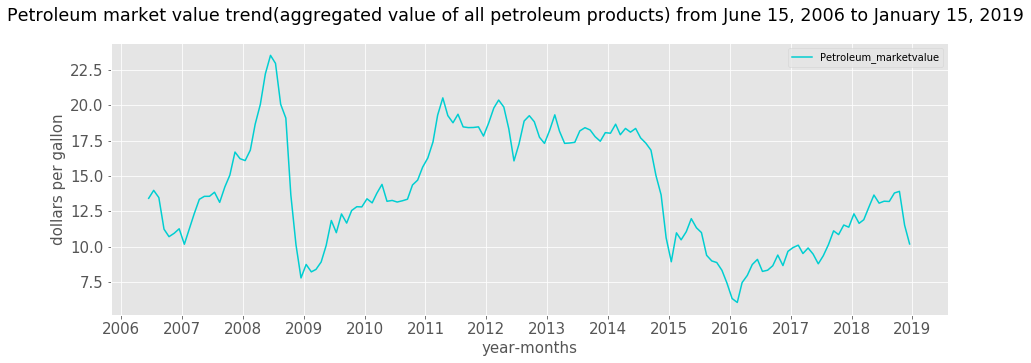

In [23]:
%matplotlib inline
import matplotlib.dates as mdates
plt.style.use('ggplot')
# plt.style.use('seaborn-white')

DF_viz1 = DF_v1[['Petroleum_marketvalue']]
DF_viz1.index= DF_v1['Date']

fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1,1,wspace = 0, hspace = 0)

fig.suptitle("Petroleum market value trend(aggregated value of all petroleum products) from June 15, 2006 to January 15, 2019", fontsize = 17.5)

ax1= fig.add_subplot(gs[0,0])
ax1.plot(DF_viz1,color = "darkturquoise")
ax1.legend(DF_viz1)
ax1.set_xlabel('year-months', fontsize = 15)
ax1.set_ylabel('dollars per gallon', fontsize = 15)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.tick_params(labelsize = 15)
plt.show()

In [24]:
DF_v1[['Petroleum_marketvalue']].describe()

,Petroleum_marketvalue
count,151.000000
mean,13.946680
std,4.000288
min,6.053714
25%,10.776571
50%,13.380619
75%,17.794071
max,23.520381


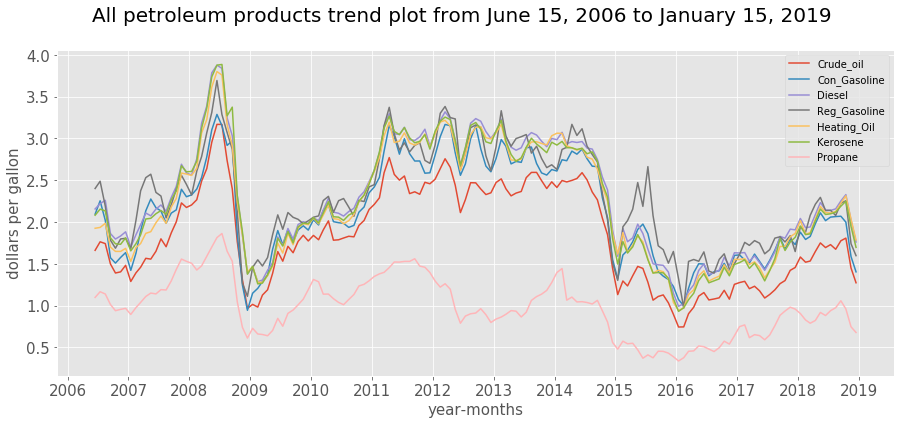

In [25]:
%matplotlib inline
plt.style.use('ggplot')
# plt.style.use('seaborn-white')

DF_viz1 = DF_v1[['Crude_oil','Con_Gasoline','Diesel','Reg_Gasoline','Heating_Oil','Kerosene','Propane']]
DF_viz1.index= DF_v1['Date']

fig = plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(1,1,wspace = 0, hspace = 0)

fig.suptitle("All petroleum products trend plot from June 15, 2006 to January 15, 2019", fontsize = 20)

ax1= fig.add_subplot(gs[0,0])
ax1.plot(DF_viz1)
ax1.legend(DF_viz1)
ax1.set_xlabel('year-months', fontsize = 15)
ax1.set_ylabel('dollars per gallon', fontsize = 15)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.tick_params(labelsize = 15)
plt.show()

In [26]:
DF_v1[['Crude_oil','Con_Gasoline','Diesel','Reg_Gasoline','Heating_Oil','Kerosene','Propane']].describe()

,Crude_oil,Con_Gasoline,Diesel,Reg_Gasoline,Heating_Oil,Kerosene,Propane
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.834809,2.121321,2.284987,2.292099,2.205477,2.228742,0.979245
std,0.574902,0.586041,0.667243,0.591401,0.668328,0.689225,0.345109
min,0.742619,0.943000,0.991000,0.970000,0.939000,0.930000,0.336000
25%,1.302679,1.611250,1.796167,1.789500,1.666000,1.707000,0.741500
50%,1.775238,2.027000,2.144333,2.245000,2.040000,2.098000,0.959000
75%,2.380298,2.682500,2.957333,2.813500,2.889500,2.886500,1.190000
max,3.169048,3.288000,3.877333,3.694000,3.801000,3.886000,1.862000


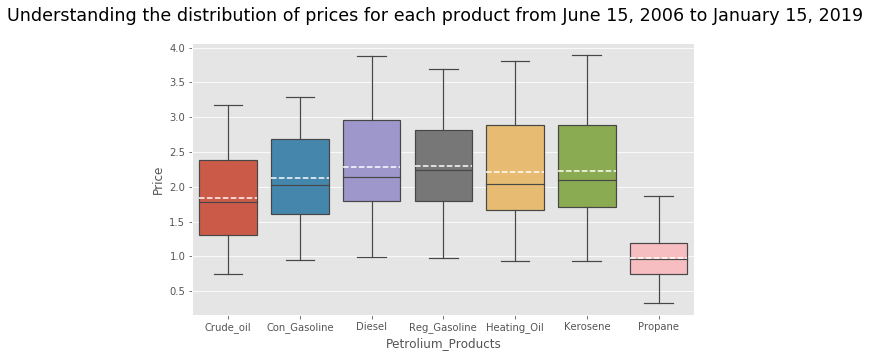

In [27]:
%matplotlib inline
plt.style.use('ggplot')

DF_viz1= pd.melt(DF_v1[['Date','Crude_oil','Con_Gasoline','Diesel','Reg_Gasoline','Heating_Oil','Kerosene','Propane']],
                id_vars=["Date"], 
                var_name = "Petrolium_Products", value_name='Price')

fig = plt.figure(figsize=(9,5))

gs = gridspec.GridSpec(1,1,wspace = 0, hspace = 0)

fig.suptitle("Understanding the distribution of prices for each product from June 15, 2006 to January 15, 2019", fontsize = 17.5)

ax1= fig.add_subplot(gs[0,0])
sns.set_context("paper", font_scale=1.2)  
ax1 = sns.boxplot(x="Petrolium_Products", y="Price", data=DF_viz1,meanprops= dict(linestyle='--', linewidth=1.5, color='white'), showmeans = True,meanline = True)

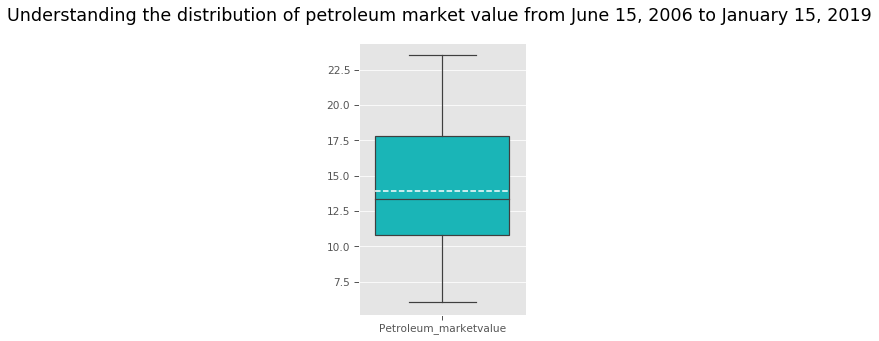

In [28]:
%matplotlib inline
plt.style.use('ggplot')

fig = plt.figure(figsize=(3,5))

gs = gridspec.GridSpec(1,1,wspace = 0, hspace = 0)

fig.suptitle("Understanding the distribution of petroleum market value from June 15, 2006 to January 15, 2019", fontsize = 17.5)

ax1= fig.add_subplot(gs[0,0])
sns.set_context("paper", font_scale=1.2)  
ax1 = sns.boxplot(data=DF_v1[['Petroleum_marketvalue']],color = "darkturquoise", 
                  meanprops= dict(linestyle='--', linewidth=1.5, color='white'), showmeans = True,meanline = True)

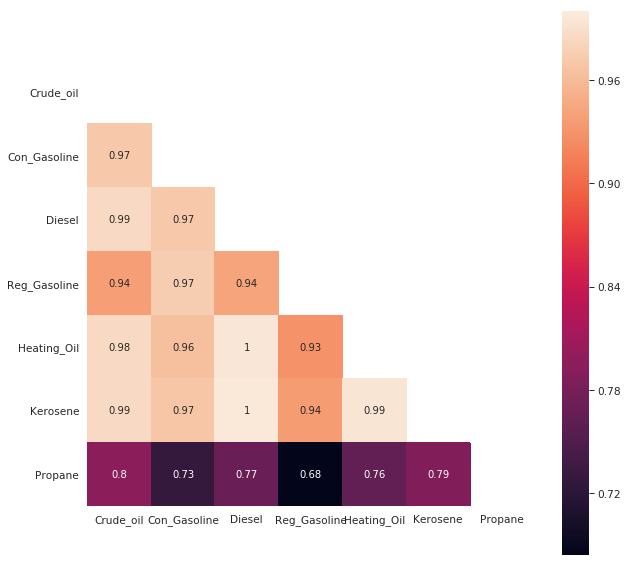

In [29]:
%matplotlib inline
plt.style.use('ggplot')
corr = DF_v1[['Date','Crude_oil','Con_Gasoline','Diesel','Reg_Gasoline','Heating_Oil','Kerosene','Propane']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,annot = True, square=True)

## 5. Export data for crude oil price prediction for next 6 months in R

In [31]:
Crude_oil_data =  Crude_oil.dropna().reset_index()
#take the average of crudeoil prices
Crude_oil_data['Crude_oil'] = Crude_oil_data.loc[: , "Cushing, OK WTI Spot Price FOB (Dollars per Barrel)":"Europe Brent Spot Price FOB (Dollars per Barrel)"].mean(axis=1)
# convert crude oil to dollars per gallon price 
Crude_oil_data['Crude_oil']= Crude_oil_data['Crude_oil']/42
Crude_oil_data.to_csv('/Users/ranjitarajeevashetty/Library/Mobile Documents/com~apple~CloudDocs/Interview/2019 full time/Fitbit/data.csv')
Crude_oil_data.head()

,index,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel),Crude_oil
0,16,1987-05-15,19.44,18.58,0.452619
1,17,1987-06-15,20.07,18.86,0.463452
2,18,1987-07-15,21.34,19.86,0.490476
3,19,1987-08-15,20.31,18.98,0.467738
4,20,1987-09-15,19.53,18.31,0.450476


## 6. Price changes month over month

In [32]:
DF_sub = DF_v1[['Date','Crude_oil','Con_Gasoline','Diesel','Reg_Gasoline','Heating_Oil','Kerosene','Propane']]

for col in DF_sub.iloc[ :, 1:]:
    DF_sub["%s_%s"%(col,"diff")] = DF_sub[col]-DF_sub[col].shift(1)

/Users/ranjitarajeevashetty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [33]:
DF_sub.head()

,Date,Crude_oil,Con_Gasoline,Diesel,Reg_Gasoline,Heating_Oil,Kerosene,Propane,Crude_oil_diff,Con_Gasoline_diff,Diesel_diff,Reg_Gasoline_diff,Heating_Oil_diff,Kerosene_diff,Propane_diff
0,2006-06-15,1.660833,2.0940,2.156000,2.401,1.925,2.081,1.097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-07-15,1.762857,2.2535,2.219000,2.488,1.935,2.154,1.165,0.102024,0.1595,0.063000,0.087,0.010,0.073,0.068
2,2006-08-15,1.741310,2.0195,2.260000,2.190,1.984,2.133,1.138,-0.021548,-0.2340,0.041000,-0.298,0.049,-0.021,-0.027
3,2006-09-15,1.497143,1.5715,1.861000,1.782,1.699,1.810,1.012,-0.244167,-0.4480,-0.399000,-0.408,-0.285,-0.323,-0.126
4,2006-10-15,1.389286,1.5080,1.795667,1.686,1.648,1.739,0.938,-0.107857,-0.0635,-0.065333,-0.096,-0.051,-0.071,-0.074


In [34]:
DF_viz1 = DF_sub[['Date','Crude_oil_diff']]
DF_viz1 = DF_viz1.dropna()
DF_viz1['Date_month'] = DF_viz1['Date'].map(lambda x: 100*x.year + x.month)
DF_viz1.head()

,Date,Crude_oil_diff,Date_month
1,2006-07-15,0.102024,200607
2,2006-08-15,-0.021548,200608
3,2006-09-15,-0.244167,200609
4,2006-10-15,-0.107857,200610
5,2006-11-15,0.013571,200611


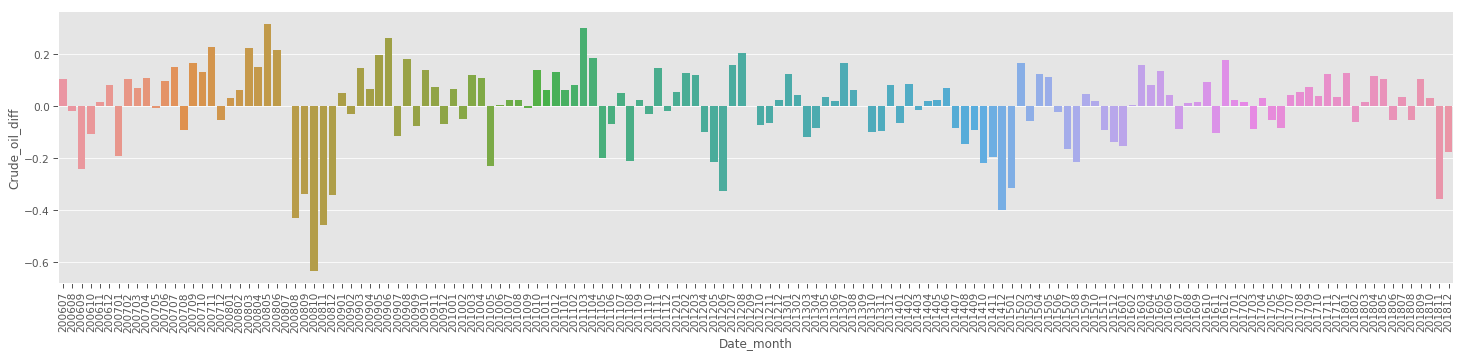

In [35]:
%matplotlib inline
plt.style.use('ggplot')

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(25,5))

gs = gridspec.GridSpec(1,1,wspace = 0, hspace = 0)


ax1= fig.add_subplot(gs[0,0])
sns.set_context("paper", font_scale=1)  
ax1 = sns.barplot(x = 'Date_month',y= 'Crude_oil_diff',data = DF_viz1)
plt.xticks(rotation=90)
plt.show()

## 7: Summarized price and summarized price movements by year

In [36]:
DF_sub = DF_v1[['Date','Crude_oil','Con_Gasoline','Diesel','Reg_Gasoline','Heating_Oil','Kerosene','Propane']]
DF_sub['Summarized_Price']=DF_sub.loc[:,"Crude_oil":"Propane"].sum(axis = 1)
DF_sub['Year']=pd.DatetimeIndex(DF_sub['Date']).year

DF_year=DF_sub.groupby(['Year']).mean().reset_index()

/Users/ranjitarajeevashetty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ranjitarajeevashetty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
DF_year.head()

,Year,Crude_oil,Con_Gasoline,Diesel,Reg_Gasoline,Heating_Oil,Kerosene,Propane,Summarized_Price
0,2006,1.562228,1.807929,2.000952,2.021286,1.789000,1.922857,1.038571,12.142823
1,2007,1.723611,2.048583,2.181778,2.291833,2.031583,2.129917,1.207417,13.614722
2,2008,2.338323,2.458542,2.934111,2.626583,2.852750,2.961667,1.412083,17.584060
3,2009,1.466002,1.644208,1.683361,1.840917,1.641417,1.659250,0.841833,10.776988
4,2010,1.891746,2.071667,2.184694,2.209667,2.124833,2.146083,1.165500,13.794190


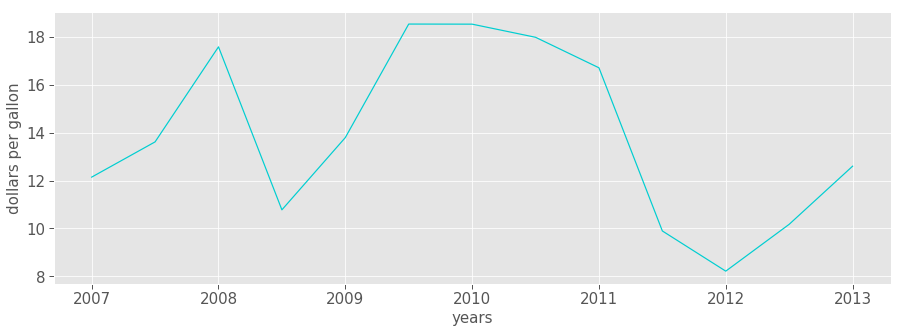

In [38]:
%matplotlib inline
import matplotlib.dates as mdates
plt.style.use('ggplot')

DF_viz1 = DF_year[['Summarized_Price']]
DF_viz1.index= DF_year['Year']

fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1,1,wspace = 0, hspace = 0)


ax1= fig.add_subplot(gs[0,0])
ax1.plot(DF_viz1,color = "darkturquoise")
# ax1.legend(DF_viz1)
ax1.set_xlabel('years', fontsize = 15)
ax1.set_ylabel('dollars per gallon', fontsize = 15)
ax1.tick_params(labelsize = 15)
ax1.set_xticklabels(DF_year['Year'])
plt.show()

## 8: Identify the correlation between Conventional Gasoline prices between New York Harbor and U.S. Gulf Coast

In [39]:
data = Con_Gasoline[['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
                     'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)']]
pearson_correlation = data.corr(method='pearson')
pearson_correlation

,New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)
New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),1.000000,0.998032
U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),0.998032,1.000000


## 9: Prices of all products lower than previous data points¶

In [40]:
DF_sub[DF_sub['Crude_oil'] ==DF_sub['Crude_oil'].min()]['Date'].values[0].astype(str)

'2016-01-15T00:00:00.000000000'

In [41]:
DF_sub = DF_v1[['Date','Crude_oil','Con_Gasoline','Diesel','Reg_Gasoline','Heating_Oil','Kerosene','Propane']]
for col in DF_sub.iloc[ :, 1:]:
    print(col + ' had its lowest spot price on month      :' + '\n'+ DF_sub[DF_sub[col] ==DF_sub[col].min()]['Date'].values[0].astype(str))

Crude_oil had its lowest spot price on month      :
2016-01-15T00:00:00.000000000
Con_Gasoline had its lowest spot price on month      :
2008-12-15T00:00:00.000000000
Diesel had its lowest spot price on month      :
2016-01-15T00:00:00.000000000
Reg_Gasoline had its lowest spot price on month      :
2016-02-15T00:00:00.000000000
Heating_Oil had its lowest spot price on month      :
2016-01-15T00:00:00.000000000
Kerosene had its lowest spot price on month      :
2016-01-15T00:00:00.000000000
Propane had its lowest spot price on month      :
2016-01-15T00:00:00.000000000
